### To Do: 

- mlp introspectors
- coeff error logging


In [204]:
# ==== Imports ====
import argparse
import time
from dataclasses import dataclass
from typing import Optional, Tuple

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import random
import math
import torch.nn.functional as F

import os, json, itertools, tempfile, shutil
from pathlib import Path
from collections import OrderedDict

# feature_library.py
from __future__ import annotations

from dataclasses import dataclass
from typing import Callable, Dict, Iterable, List, Optional, Tuple

import torch


A =
 tensor([[ 1.3200, -0.9442, -0.0132],
        [-0.1799, -1.2179, -0.1500],
        [-0.6777,  1.4768,  0.9982]])
cond(A) = 4.325112342834473


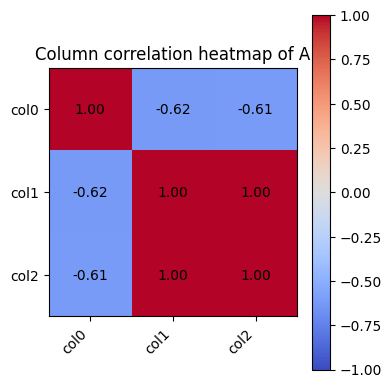

In [ ]:
A=torch.randn(3,3)
sv = torch.linalg.svdvals(A)
cond_A = float(sv.max() / sv.min().clamp_min(1e-12))
print("A =\n", A)
print("cond(A) =", cond_A)
arr = A.detach().cpu().numpy()

def heatmap(matrix, title="Heatmap", xlabel="X", ylabel="Y"):
    # Column correlation heatmap for A
    corr = np.corrcoef(arr, rowvar=False)

    fig, ax = plt.subplots(figsize=(4, 4))
    im = ax.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
    ax.set_xticks(np.arange(corr.shape[0])); ax.set_yticks(np.arange(corr.shape[0]))
    ax.set_xticklabels([f"col{i}" for i in range(corr.shape[0])])
    ax.set_yticklabels([f"col{i}" for i in range(corr.shape[0])])
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
    for i in range(corr.shape[0]):
        for j in range(corr.shape[1]):
            ax.text(j, i, f"{corr[i, j]:.2f}", ha="center", va="center", color="black")
    ax.set_title("Column correlation heatmap of A")
    fig.colorbar(im, ax=ax)
    plt.tight_layout()
    plt.show()

heatmap(arr, title="Matrix A Heatmap", xlabel="Columns", ylabel="Rows")

In [206]:
# ==== Device Selection ====
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


In [207]:
W1s = []
W2s = []

In [ ]:
bad_cond = torch.tensor([[2,1,1],[0,4,4],[0,5,5]], requires_grad=True, dtype=torch.float32)

Q, R = torch.qr(bad_cond)
print("Badly conditioned matrix QR Decomposition successful.")
print("Q matrix:\n", Q)    
print("R matrix:\n", R)
print("QR = \n", Q@R)
print("bad_cond = \n", bad_cond)

target cond=1.0e+00, achieved cond=1.000e+00
tensor([[-0.3336,  0.0335, -0.9421],
        [-0.9349,  0.1168,  0.3352],
        [ 0.1213,  0.9926, -0.0077]]) 

target cond=1.0e+01, achieved cond=1.000e+01
tensor([[ 0.1622,  0.2014, -0.7721],
        [-0.3292, -0.0167,  0.4919],
        [-0.0604,  0.2655, -0.1491]]) 

target cond=1.0e+02, achieved cond=1.000e+02
tensor([[ 0.6767,  0.2413, -0.5531],
        [ 0.0123,  0.0133,  0.0044],
        [-0.2974, -0.2166,  0.2287]]) 

target cond=1.0e+04, achieved cond=1.000e+04
tensor([[0.6264, 0.2316, 0.0581],
        [0.4725, 0.1801, 0.0433],
        [0.5088, 0.1788, 0.0485]]) 

target cond=1.0e+08, achieved cond=9.952e+07
tensor([[ 0.1392,  0.0032,  0.6329],
        [ 0.1175,  0.0027,  0.5339],
        [-0.1140, -0.0026, -0.5179]]) 

bad_cond achieved cond=1.742e+08
Badly conditioned matrix QR Decomposition successful.
Q matrix:
 tensor([[ 1.0000,  0.0000,  0.0000],
        [-0.0000, -0.6247, -0.7809],
        [-0.0000, -0.7809,  0.6247]], grad

C:\Users\sami\AppData\Local\Temp\ipykernel_9668\3206947785.py:27: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\python_variable_methods.cpp:836.)
  cond_bad = float(sv_bad.max() / sv_bad.min().clamp_min(1e-12))


In [292]:
optimizer.zero_grad()                     

In [305]:
con = list(mlp.parameters())
print("current grads:", mlp.model[0].weight.grad)
print(con)


current grads: tensor([[-4.9345, -7.5546,  1.2571]])
[Parameter containing:
tensor([[-0.4819,  0.4307, -0.1511]], requires_grad=True)]


In [307]:
class examp_MLP(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(examp_MLP, self).__init__()
        layers = []
        layers.append(nn.Linear(input_size, hidden_size, bias=False))
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.model(x)

mlp = examp_MLP(input_size=1, hidden_size=1)

dummy = torch.randn(1, 1, requires_grad=True)
b = torch.sum(dummy, dim=1, keepdim=True)
out = mlp(dummy)
optimizer = torch.optim.SGD(mlp.parameters(), lr=0.1)

print(f'dummy: \n{dummy}')
print(f'out: \n{out}')
print(list(mlp.model.parameters()))

dummy: 
tensor([[0.5428]], requires_grad=True)
out: 
tensor([[-0.1008]], grad_fn=<MmBackward0>)
[Parameter containing:
tensor([[-0.1857]], requires_grad=True)]


In [304]:
optimizer.param_groups[0]['lr'] = 0.01
for step in range(1):
    grads.append(mlp.model[0].weight.grad)
    losses.append(loss.item())
    optimizer.zero_grad()                     # critical
    out = mlp(dummy)                          # NEW forward pass each step
    loss = torch.mean((out-b) ** 2)
    loss.backward()
    optimizer.step() 
print(f'loss = {loss.item()}')
print(f'New params: \n{list(mlp.model.parameters())}')

loss = 5.498199462890625
New params: 
[Parameter containing:
tensor([[-0.4819,  0.4307, -0.1511]], requires_grad=True)]


In [ ]:
optimizer.param_groups[0]['lr'] = 0.01
for step in range(1000):
    losses.append(loss.item())
    optimizer.zero_grad()                     # critical
    Q, R = torch.qr(dummy)
    out = mlp(dummy)                          # NEW forward pass each step
    loss = torch.mean((out - b) ** 2)
    loss.backward()
    optimizer.step()
print(f'loss = {loss.item()}')
print(f'New params: \n{list(mlp.model.parameters())}')

In [ ]:
# Build a 2D tensor [steps, in_dim] from the list `grads` (handles None entries)
ref_w = mlp.model[0].weight
in_dim = ref_w.shape[1]
dtype = ref_w.detach().cpu().dtype

grads_arr = torch.stack([
    (g.detach().cpu().squeeze(0) if (g is not None) else torch.zeros(in_dim, dtype=dtype))
    for g in grads
], dim=0)  # shape: (steps, in_dim)

# individual columns (gradients over steps for each input feature)
col0 = grads_arr[:, 0]
col1 = grads_arr[:, 1]
col2 = grads_arr[:, 2]

# quick inspect
grads_arr.shape, col0[:5], col1[:5], col2[:5]

TypeError: list indices must be integers or slices, not tuple

Text(0.5, 0, 'Iteration')

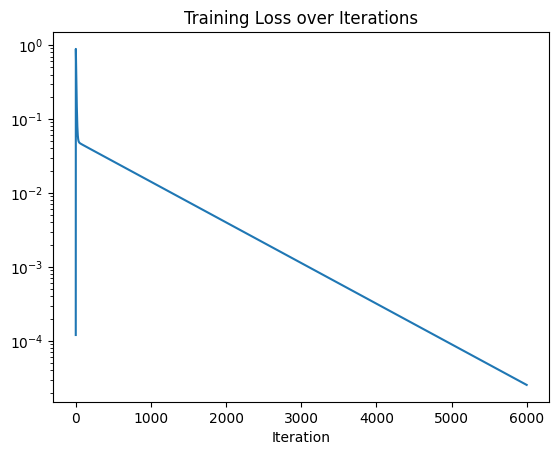

In [255]:
plt.plot(losses)
plt.yscale('log')
plt.title('Training Loss over Iterations')
plt.xlabel('Iteration')

In [213]:
# === MLPs ===

class Sin(nn.Module):
    def forward(self, input):
        return torch.sin(input)

def _tensor_stats(x):
    x = x.detach()
    return dict(
        l1=float(x.abs().sum()),
        l2=float(torch.linalg.norm(x).item()),
        mean=float(x.mean()),
        std=float(x.std()),
        max=float(x.max()),
        min=float(x.min()),
        nnz=int((x!=0).sum().item()),
        numel=x.numel(),
    )

class SimpleMLP(nn.Module):
    def __init__(self, n_layers, hidden_size):
        super(SimpleMLP, self).__init__()
        assert n_layers >= 2, "n_layers must be at least 2"

        layers = []
        # First layer: input (2,) -> hidden_size
        layers.append(nn.Linear(2, hidden_size))
        layers.append(Sin())

        # Hidden layers: (m -> m)
        for _ in range(n_layers - 2):
            layers.append(nn.Linear(hidden_size, hidden_size))
            layers.append(Sin())

        # Final layer: (m -> 1)
        layers.append(nn.Linear(hidden_size, 1))

        self.model = nn.Sequential(*layers)

    def forward(self, t, x):
        input_tensor = torch.cat((t, x), dim=1)  # Concatenate along feature axis
        return self.model(input_tensor)

class LossBalancer(torch.nn.Module):
    def __init__(self, n_terms=3):
        super().__init__()
        self.log_sigmas = torch.nn.Parameter(torch.zeros(n_terms))  # [s_d, s_p, s_s]

    def combine(self, losses):  # list/tuple of scalars
        s = self.log_sigmas
        weighted = sum(torch.exp(-s[i]) * losses[i] + s[i] for i in range(len(losses)))
        return weighted

class symMLP(nn.Module):
    def __init__(self, input_size, n_layers, hidden_size, linear_only=False, bias=False):
        super(symMLP, self).__init__()
        assert n_layers >= 1, "n_layers must be at least 1"

        layers = []
        if n_layers == 1:
            # Direct input -> output
            layers.append(nn.Linear(input_size, 1, bias=bias))
        else:
            # First layer: input -> hidden
            layers.append(nn.Linear(input_size, hidden_size))
            if not linear_only:
                layers.append(nn.ReLU())
            # Intermediate layers
            for _ in range(n_layers - 2):
                layers.append(nn.Linear(hidden_size, hidden_size))
                if not linear_only:
                    layers.append(nn.ReLU())
            # Final layer
            layers.append(nn.Linear(hidden_size, 1))

        self.model = nn.Sequential(*layers)

    def forward(self, x):   
        return self.model(x)
   
    def stats(self, with_grads=False):
        """Layer stats + effective input→output coefficients and their stats."""
        out = OrderedDict()
        for i, m in enumerate(self.model):
            if isinstance(m, nn.Linear):
                out[f"layer{i}.weight"] = _tensor_stats(m.weight)
                if m.bias is not None:
                    out[f"layer{i}.bias"] = _tensor_stats(m.bias)
                if with_grads and m.weight.grad is not None:
                    out[f"layer{i}.weight_grad"] = _tensor_stats(m.weight.grad)
                if with_grads and m.bias is not None and m.bias.grad is not None:
                    out[f"layer{i}.bias_grad"] = _tensor_stats(m.bias.grad)
        eff = self.effective_coeffs()
        out["effective_coeffs_vector"] = {
            "values": eff.detach().cpu().numpy().tolist(),
            **_tensor_stats(eff)
        }
        return out

    def effective_coeffs(self):
        """Return a single Linear-equivalent weight vector for input features (ignores bias comp)."""
        layers = [L for L in self.model if isinstance(L, nn.Linear)]
        W = layers[0].weight.detach()
        for L in layers[1:]:
            W = L.weight.detach() @ W
        return W.flatten()  # shape [n_features]

class SymNetHead(nn.Module):
    """
    Minimal SymNet-ish head:
    - takes primitive features (B, F) e.g. [u, u_x/a, u_xx/a^2]
    - grows a small learned product library
    - linear readout to (B, 1)
    """
    def __init__(self, primitive_names, primitive_orders, product_layers=(8, 8),
                 add_linear_skip=True, readout_bias=True):
        super().__init__()
        self.primitive_names = list(primitive_names)
        self.orders = torch.tensor(primitive_orders, dtype=torch.float32).view(1, -1)
        self.add_linear_skip = add_linear_skip

        self.log_a = nn.Parameter(torch.zeros(1))  # a = exp(log_a), shared scaler if necessary here
        self.W1s = []
        self.W2s = []
        F = len(primitive_names)
        L = []
        curr = F
        for M in product_layers:
            L.append(self._prod_layer(curr, M, add_linear_skip))
            curr = curr + M + (curr if add_linear_skip else 0)
        self.layers = nn.ModuleList(L)
        self.readout = nn.Linear(curr, 1, bias=readout_bias)

        # inits
        nn.init.normal_(self.readout.weight, mean=0.0, std=1e-3)
        if self.readout.bias is not None:
            nn.init.zeros_(self.readout.bias)

    @staticmethod
    def _prod_layer(in_dim, M, add_linear_skip):
        layer = nn.Module()
        layer.W1   = nn.Parameter(torch.randn(M, in_dim) * 1e-2)
        layer.W2   = nn.Parameter(torch.randn(M, in_dim) * 1e-2)
        print(f'layer W1 is {layer.W1}')
        print(f'layer.W2 is {layer.W2}\n M is {M}')
        layer.gate = nn.Parameter(torch.full((M,), -3.0))  # sigmoid ~ 0.047
        if add_linear_skip:
            layer.skip = nn.Linear(in_dim, in_dim, bias=False)
            with torch.no_grad():
                layer.skip.weight.copy_(torch.eye(in_dim))
        return layer

    def forward(self, prim_feats):
        x = prim_feats
        # If you want extra per-order normalization, uncomment the next 2 lines
        a = self.log_a.exp()
        x = x * (a ** (-self.orders.to(x.device)))  # [1,F]

        h = x
        for layer in self.layers:
            z1 = F.linear(h, layer.W1)     # (B, M)
            z2 = F.linear(h, layer.W2)     # (B, M)
            #g  = torch.sigmoid(layer.gate).view(1, -1)
            g=1.0
            y  = g * (z1 * z2)             # (B, M)
            
            if hasattr(layer, "skip"):
                s  = layer.skip(h)
                h  = torch.cat([h, y, s], dim=-1)
            else:
                h  = torch.cat([h, y], dim=-1)
        ut = self.readout(h)
        self.W1s.append(layer.W1)
        self.W2s.append(layer.W2)

        return ut  # keep API: (B,1)

class SymNetAdapter(nn.Module):
    """
    Wrap SymNetHead so trainer.v(x) stays valid.
    """
    def __init__(self, symnet):
        super().__init__()
        self.sym = symnet
    def forward(self, x):
        return self.sym(x)

@dataclass(frozen=True)
class FeatureSpec:
    """A single library term specification.

    power: exponent p such that feature = raw / a_hat**p  (or includes the scaling explicitly).
           This is what your downstream physical mapping uses.
    """
    name: str
    power: int
    fn: Callable[["FeatureLibrary", torch.Tensor, Optional[torch.Tensor], Optional[torch.Tensor], torch.Tensor, bool], torch.Tensor]

class FeatureLibrary:
    """Standalone PDE feature library builder with derivative caching.

    Conventions:
      - u_out is shape [N, 1]
      - x, y are shape [N, 1] with requires_grad=True if derivatives needed
      - a_hat is scalar tensor (or shape [1]) on same device

    Returned:
      F: [N, n_feat] (concatenated features)
      names: list[str]
      powers: list[int]  (a-scaling exponent for each feature)
    """

    def __init__(
        self,
        terms: Iterable[str],
        device: Optional[torch.device] = None,
        allow_unknown_terms: bool = False,
    ):
        self.terms = list(terms)
        self.device = device
        self.allow_unknown_terms = allow_unknown_terms

        # term registry
        self._specs: Dict[str, FeatureSpec] = {}
        self._register_defaults()

        # derivative cache (populated per build call)
        self._cache: Dict[str, torch.Tensor] = {}

    # --------------------------
    # Public API
    # --------------------------
    def build(
        self,
        u_out: torch.Tensor,
        *,
        a_hat: torch.Tensor,
        x: Optional[torch.Tensor] = None,
        y: Optional[torch.Tensor] = None,
        create_graph: bool = True,
    ) -> Tuple[Optional[torch.Tensor], List[str], List[int]]:
        if not self.terms:
            return None, [], []

        # reset cache per call (critical: cache is only valid for this graph)
        self._cache = {}

        feats: List[torch.Tensor] = []
        names: List[str] = []
        powers: List[int] = []

        for t in self.terms:
            spec = self._specs.get(t, None)
            if spec is None:
                if self.allow_unknown_terms:
                    continue
                raise RuntimeError(f"Unknown feature term '{t}'. Allowed: {sorted(self._specs.keys())}")

            z = spec.fn(self, u_out, x, y, a_hat, create_graph)

            # enforce 2D [N, 1] so cat(dim=1) is safe
            if z.dim() == 1:
                z = z.unsqueeze(1)
            if z.dim() != 2 or z.shape[1] != 1:
                raise RuntimeError(f"Feature '{spec.name}' must be [N,1], got {tuple(z.shape)}")

            feats.append(z)
            names.append(spec.name)
            powers.append(spec.power)

        F = torch.cat(feats, dim=1) if feats else None
        if F is not None:
            if self.device is not None and F.device != self.device:
                F = F.to(self.device)
        return F, names, powers

    def __call__(self, u_out: torch.Tensor, *, a_hat: torch.Tensor, x=None, y=None, create_graph: bool = True):
        return self.build(u_out, a_hat=a_hat, x=x, y=y, create_graph=create_graph)

    # --------------------------
    # Derivative helpers (cached)
    # --------------------------
    def _grad(
        self,
        out: torch.Tensor,
        inp: torch.Tensor,
        *,
        key: str,
        create_graph: bool,
    ) -> torch.Tensor:
        if inp is None:
            raise RuntimeError(f"Cannot compute {key}: input tensor is None.")
        if key in self._cache:
            return self._cache[key]
        g = torch.autograd.grad(
            out, inp,
            grad_outputs=torch.ones_like(out),
            create_graph=create_graph,
            retain_graph=True,   # needed because multiple grads in one forward
            allow_unused=False,
        )[0]
        self._cache[key] = g
        return g

    def u_x(self, u_out: torch.Tensor, x: torch.Tensor, create_graph: bool) -> torch.Tensor:
        out = self._grad(u_out, x, key="u_x", create_graph=create_graph)
        return out/torch.norm(out)

    def u_xx(self, u_out: torch.Tensor, x: torch.Tensor, create_graph: bool) -> torch.Tensor:
        ux = self.u_x(u_out, x, create_graph=create_graph)
        return self._grad(ux, x, key="u_xx", create_graph=create_graph)

    def u_y(self, u_out: torch.Tensor, y: torch.Tensor, create_graph: bool) -> torch.Tensor:
        return self._grad(u_out, y, key="u_y", create_graph=create_graph)

    def u_yy(self, u_out: torch.Tensor, y: torch.Tensor, create_graph: bool) -> torch.Tensor:
        uy = self.u_y(u_out, y, create_graph=create_graph)
        return self._grad(uy, y, key="u_yy", create_graph=create_graph)

    # --------------------------
    # Registry
    # --------------------------
    def register(self, name: str, power: int, fn: Callable[..., torch.Tensor]) -> None:
        if name in self._specs:
            raise RuntimeError(f"Feature '{name}' already registered.")
        self._specs[name] = FeatureSpec(name=name, power=power, fn=fn)

    def _register_defaults(self) -> None:
        # NOTE: powers here are chosen so that:
        #   feature = raw / a_hat**power
        # which matches your downstream "a^{2-p}" coefficient mapping style.

        # u (unscaled). If you want u/a_hat, change this spec to (power=1, fn=lambda...: u_out/a_hat)
        self.register(
            "u", power=0,
            fn=lambda self, u, x, y, a, cg: u
        )

        # u_x / a
        self.register(
            "u_x", power=1,
            fn=lambda self, u, x, y, a, cg: self.u_x(u, x, cg) / a
        )

        # (u_x / a)^2 = u_x^2 / a^2
        self.register(
            "u_x2", power=2,
            fn=lambda self, u, x, y, a, cg: (self.u_x(u, x, cg) / a) ** 2
        )

        # 2 u_x / a  (usually redundant; include only if you have a reason)
        self.register(
            "2u_x", power=1,
            fn=lambda self, u, x, y, a, cg: 2.0 * self.u_x(u, x, cg) / a
        )

        # u_xx / a^2
        self.register(
            "u_xx", power=2,
            fn=lambda self, u, x, y, a, cg: self.u_xx(u, x, cg) / (a ** 2)
        )

        # u_y / a
        self.register(
            "u_y", power=1,
            fn=lambda self, u, x, y, a, cg: self.u_y(u, y, cg) / a
        )

        # u_yy / a^2
        self.register(
            "u_yy", power=2,
            fn=lambda self, u, x, y, a, cg: self.u_yy(u, y, cg) / (a ** 2)
        )

        # u^2 (no a-scaling)
        self.register(
            "uu", power=0,
            fn=lambda self, u, x, y, a, cg: u * u
        )

        # (u_x/a)*(u_x/a)  (same as u_x2; keep ONE of them)
        self.register(
            "u_x_x", power=2,
            fn=lambda self, u, x, y, a, cg: (self.u_x(u, x, cg) / a) * (self.u_x(u, x, cg) / a)
        )

        # (u_x/a)*(u_xx/a^2) = u_x*u_xx / a^3
        self.register(
            "u_x_xx", power=3,
            fn=lambda self, u, x, y, a, cg: (self.u_x(u, x, cg) / a) * (self.u_xx(u, x, cg) / (a ** 2))
        )

        # u * (u_x/a) = u*u_x / a
        self.register(
            "uu_x", power=1,
            fn=lambda self, u, x, y, a, cg: u * (self.u_x(u, x, cg) / a)
        )

        # 2 u * (u_x/a)  (redundant)
        self.register(
            "2uu_x", power=1,
            fn=lambda self, u, x, y, a, cg: 2.0 * u * (self.u_x(u, x, cg) / a)
        )


In [214]:
# ==== PDE Extractor ====

def extract_symbolic_pde_deep(
    trainer,
    show_raw=True,
    show_physical=True,
    library_scales_attr=("feature_scales", "feature_powers"),  # you currently return "powers" but it is scales
    assumes_time_scaled_by_a2=True,  # True if your target is u_t / a_hat^2
    eps=1e-12,
):
    """
    Extract effective linear map v(F) = w^T F + b where F is the library fed into v.

    Supports your current library normalization:
        F_i = raw_i / scale_i   where scale_i = ||raw_i|| (detached)
    Then:
        v(F) = Σ w_i * (raw_i / scale_i) + b
      => coeff on raw_i is w_raw_i = w_i / scale_i

    Also supports optional feature standardization before v:
        Fz = (F - mu)/std  -> unstandardize back to F.

    If your training uses u_t / a_hat^2 ≈ v(F), then physical u_t is:
        u_t ≈ a_hat^2 * v(F)
      => multiply all coefficients and bias by a_hat^2.
    """

    # ---------- 1) Compose Linear stack ----------
    def bias_vec(bias, out_dim):
        if bias is None:
            return torch.zeros(out_dim, dtype=torch.float32)
        if not torch.is_tensor(bias):
            return torch.full((out_dim,), float(bias), dtype=torch.float32)
        return bias.detach().cpu().reshape(-1)

    layers = trainer.v.model
    if isinstance(layers, nn.Module) and not hasattr(layers, "__iter__"):
        layers = [layers]

    W_eff, b_eff = None, None
    for m in layers:
        if isinstance(m, nn.Linear):
            W = m.weight.detach().cpu()              # [out_dim, in_dim]
            b = bias_vec(m.bias, W.shape[0])         # [out_dim]
            if W_eff is None:
                W_eff, b_eff = W.clone(), b.clone()
            else:
                W_eff = W @ W_eff
                b_eff = (W @ b_eff.reshape(-1, 1)).reshape(-1) + b
        elif isinstance(m, (nn.ReLU, nn.Tanh, nn.Sigmoid, nn.GELU, nn.SiLU, nn.LeakyReLU, nn.ELU)):
            raise ValueError("Nonlinear activation in v; linear coefficient extraction is invalid.")
        else:
            raise ValueError(f"Unhandled layer in v: {type(m).__name__}")

    if W_eff is None:
        raise ValueError("No nn.Linear layers found in trainer.v.model.")

    if W_eff.shape[0] != 1:
        raise ValueError(f"v outputs {W_eff.shape[0]} dims; expected 1.")

    w = W_eff.reshape(-1).numpy()                      # [n_features]
    b = float(b_eff.reshape(-1)[0].item())             # scalar

    names = getattr(trainer, "feature_names", [f"f{i}" for i in range(len(w))])

    # ---------- 2) Unstandardize if needed (back to F-space) ----------
    mu  = getattr(trainer, "_feat_mu", None)
    std = getattr(trainer, "_feat_std", None)

    if std is not None:
        std_np = std.detach().cpu().numpy().reshape(-1)
        std_np = np.clip(std_np, eps, None)
        mu_np  = mu.detach().cpu().numpy().reshape(-1) if mu is not None else np.zeros_like(std_np)

        # v(Fz)=w^T Fz + b, Fz=(F-mu)/std -> v(F)=(w/std)^T F + (b - (w/std)^T mu)
        w_F = w / std_np
        b_F = b - float((w_F * mu_np).sum())
    else:
        w_F, b_F = w, b

    # ---------- 3) Undo your library column normalization (raw features) ----------
    scales = None
    if library_scales_attr is not None:
        if isinstance(library_scales_attr, (tuple, list)):
            for attr in library_scales_attr:
                if hasattr(trainer, attr):
                    scales = getattr(trainer, attr)
                    if scales is not None:
                        break
        else:
            scales = getattr(trainer, library_scales_attr, None)

    if scales is not None:
        if torch.is_tensor(scales):
            s = scales.detach().cpu().numpy().reshape(-1)
        else:
            s = np.asarray(scales).reshape(-1)

        if len(s) != len(w_F):
            raise ValueError(f"Scale length {len(s)} != n_features {len(w_F)}")

        s = np.clip(s, eps, None)
        w_raw = w_F / s
        b_raw = b_F
    else:
        # If you didn't store scales, we can't map back to raw reliably.
        w_raw, b_raw = w_F, b_F

    # ---------- printing ----------
    print("\nCoefficients on F (features fed into v):")
    print(f"  b_F  = {b_F:.6f}")
    for wi, nm in zip(w_F, names):
        print(f"  {wi:+.6f} · {nm}")

    if show_raw:
        print("\nCoefficients on raw library terms (undoing per-column ||raw|| normalization):")
        print(f"  b_raw = {b_raw:.6f}")
        for wi, nm in zip(w_raw, names):
            print(f"  {wi:+.6f} · {nm}")

    # ---------- 4) Optional physical u_t conversion ----------
    a_hat = float(torch.exp(trainer.log_a).detach().cpu()) if hasattr(trainer, "log_a") else 1.0

    if show_physical and assumes_time_scaled_by_a2:
        w_phys = (a_hat ** 2) * w_raw
        b_phys = (a_hat ** 2) * b_raw
        print("\nPhysical u_t coefficients (assuming training used u_t / a_hat^2):")
        print(f"  a_hat = {a_hat:.6f}")
        print(f"  b_phys = {b_phys:.6f}")
        for wi, nm in zip(w_phys, names):
            print(f"  {wi:+.6f} · {nm}")
        return w_phys, b_phys, names

    return w_raw, b_raw, names


In [225]:
# === Trainer ===
def _soft_thresh(x, lam):
    # elementwise soft-threshold
    return torch.sign(x) * torch.clamp(torch.abs(x) - lam, min=0.0)

class PDETrainerNonlinear:
    def __init__(self, u_config, v_config, lr=1e-3, lambda_pde=1.0, lambda_reg=1e-3, lambda_a=1e-3, lambda_tv=1e-4, lambda_data=1.0, selected_derivs=(), device=device, true_pde=None):
        self.device = device
        self.u = SimpleMLP(**u_config).to(self.device)
        self.v = symMLP(**v_config).to(self.device)
        self.log_a = nn.Parameter(torch.zeros(1, device=self.device))
        self.lambda_pde = lambda_pde
        self.lambda_reg = lambda_reg
        self.lambda_a   = lambda_a
        self.lambda_data = lambda_data
        self.selected_derivs = list(selected_derivs)
        self.lambda_tv = lambda_tv
        params = list(self.u.parameters()) + list(self.v.parameters()) + [self.log_a]
        self.optimizer = optim.SGD(params, lr=lr)
        self.mse = nn.MSELoss()
        self.true_pde = true_pde
    
    def _grad_norm_module(self, module):
        total = 0.0
        for p in module.parameters():
            if p.grad is not None:
                total += p.grad.pow(2).mean()
        if total == 0.0:
            return 0.0
        return float(total.sqrt().item())
    
    def _build_features(self, u_out, a_hat, x=None, y=None, terms=None, eps=1e-12):
        """
        Build library matrix F with per-feature norm normalization.

        New contract:
        - F_i = raw_i / scale_i
        - scales[i] = ||raw_i||_2  (detached scalar, >= eps)
        - Return: F [batch, n_feat], names [list[str]], scales [list[float or tensor]]

        Notes:
        - 'scales' replaces your old overloaded 'powers'. Keep the return name if you must,
            but treat it as a scale factor everywhere downstream.
        - If you still apply a_hat factors inside raw_i, they will largely cancel under norm-normalization.
        """
        if terms is None:
            raise RuntimeError("No terms provided ~ _build_features requires 'terms' argument")

        feats, names, scales = [], [], []

        def Lp_norm_detached(t: torch.Tensor, pth=2) -> torch.Tensor:
            # scalar Lp norm over all entries
            return t.detach().reshape(-1).norm(p=pth).clamp_min(eps)

        def add(name: str, raw: torch.Tensor, normalize: bool = True, scale_override: torch.Tensor | None = None):
            if raw is None:
                return
            if normalize:
                s = scale_override if scale_override is not None else Lp_norm_detached(raw, pth=2)
                col = raw / s
            else:
                s = torch.tensor(1.0, device=raw.device, dtype=raw.dtype)
                col = raw
            feats.append(col)
            names.append(name)
            scales.append(s)

        need = set(terms)

        # ---- cache derivatives to avoid recomputation ----
        u_x = u_xx = u_y = u_yy = None

        if x is not None and ({"u_x","2u_x","u_xx","u_x_x","u_x_xx","uu_x","2uu_x"} & need):
            u_x = torch.autograd.grad(u_out, x, grad_outputs=torch.ones_like(u_out), create_graph=True)[0]

        if x is not None and ({"u_xx","u_x_xx"} & need):
            u_xx = torch.autograd.grad(u_x, x, grad_outputs=torch.ones_like(u_x), create_graph=True)[0]

        if y is not None and ({"u_y","u_yy"} & need):
            u_y = torch.autograd.grad(u_out, y, grad_outputs=torch.ones_like(u_out), create_graph=True)[0]

        if y is not None and ("u_yy" in need):
            u_yy = torch.autograd.grad(u_y, y, grad_outputs=torch.ones_like(u_y), create_graph=True)[0]

        # ---- build raw features ----
        if "u" in need and x is not None:
            add("u", u_out, normalize=True)

        if "u_x" in need and x is not None:
            add("u_x", u_x, normalize=True)

        if "2u_x" in need and x is not None:
            raw = 2 * u_x
            add("2u_x", raw, normalize=True)

        if "u_xx" in need and x is not None:
            add("u_xx", u_xx, normalize=True)

        if y is not None and "u_y" in need:
            raw = u_y
            add("u_y", raw, normalize=True)

        if y is not None and "u_yy" in need:
            raw = u_yy
            add("u_yy", raw, normalize=True)

        if "uu" in need:
            add("uu", u_out * u_out, normalize=True)

        if "u_x_x" in need and x is not None:
            add("u_x_x", u_x * u_x, normalize=True)

        if "u_x_xx" in need and x is not None:
            add("u_x_xx", u_x * u_xx, normalize=True)

        if "uu_x" in need and x is not None:
            add("uu_x", u_out * u_x, normalize=True)

        if "c" in need:
            add("c", torch.ones_like(u_out), normalize=False)

        F = torch.cat(feats, dim=1) if feats else None
        if F is not None and F.device != self.device:
            F = F.to(self.device)

        return F, names, scales  

    def _pdenet_get(self): 
        return extract_symbolic_pde_deep(self)
    
    def _pde_truth(self, u_out, x=None, y=None): 
        '''
        ex: 
        true_pde = {
            'u_xx': 0.02, 
            'uu_x': -1.0, 
        }
        F_true = dict_to_tensor(true_pde)
        _pde_truth is dict_to_tensor
        expected output (using _pde_truth) so that u_t - F_true@F works: 
        '''

        a_hat = torch.exp(self.log_a).detach()
        terms = list(self.true_pde.keys())
        coeffs = torch.tensor([self.true_pde[t] for t in terms], device=self.device, dtype=torch.float32).view(-1, 1)
        F_true, _, __ = self._build_features(u_out, a_hat, x=x, y=y, terms=terms)
        if F_true is None:
            raise RuntimeError("No features were produced; check provided term library (reminder: _build_feats(terms=...))")
        
        RHS = F_true @ coeffs  # [B, 1]

        return RHS

    def set_lrs(self, lr_u=None, lr_v=None, lr_a=None):
    # param_groups: 0=u, 1=v, 2=a
        if lr_u is not None: self.optimizer.param_groups[0]["lr"] = lr_u
        if lr_v is not None: self.optimizer.param_groups[1]["lr"] = lr_v
        if lr_a is not None: self.optimizer.param_groups[2]["lr"] = lr_a

    def elastic_flash(
        self,
        batch_fn,
        num_batches: int = 300,
        lambda1: float = 1e-3,       # L1 strength (sparsity)
        lambda2: float = 1e-4,       # L2 (ridge) strength
        standardize: bool = True,    # z-score features, center target
        max_iter: int = 2000,
        tol: float = 1e-6,
        verbose: bool = True,
    ):
        """
        Elastic-net initializer for v:
        - Freeze u and a
        - Cache (F, y) with y = u_t / a^2 and F = selected feature stack from u
        - Solve elastic-net via coordinate descent on the standardized problem
        - Write (w, b) into the first Linear of v (expects Linear(in=n_feat, out=1))
        """
        device = next(self.u.parameters()).device
        dtype  = torch.float64  # more stable for Gram/CD; cast back when writing

        # 0) freeze u and a; keep v untouched while solving
        for p in self.u.parameters(): p.requires_grad_(False)
        self.log_a.requires_grad_(False)
        self.u.eval(); self.v.eval()

        # 1) cache features/targets from the frozen u
        F_list, y_list = [], []
        feat_names = None; feat_powers = None

        for _ in range(num_batches):
            out = batch_fn()
            # minimal tolerance for different batch_fns: (t, x, y) or (t, x, _, y)
            if len(out) == 3:
                t, x, _ydata = out
            elif len(out) == 4:
                t, x, _z, _ydata = out
            else:
                raise ValueError("batch_fn must return (t,x,y) or (t,x,*,y)")

            t = t.to(device).requires_grad_(True)
            x = x.to(device).requires_grad_(True)

            u_out = self.u(t, x)

            a_hat = torch.exp(self.log_a).detach()
            F, names, powers = self._build_features(u_out, a_hat, x=x, y=None, terms=self.selected_derivs)

            if F is None:
                raise RuntimeError("No features were produced; check selected_derivs.")

            # target y = u_t / a^2
            u_t = torch.autograd.grad(u_out, t, grad_outputs=torch.ones_like(u_out), create_graph=False)[0]
            y_tgt = (u_t / (a_hat ** 2)).squeeze(1)  # [N]

            F_list.append(F.detach())
            y_list.append(y_tgt.detach())
            feat_names, feat_powers = names, powers   # keep last (they're the same)

        X = torch.cat(F_list, dim=0).to(device=device, dtype=dtype)  # [N, d]
        y = torch.cat(y_list, dim=0).to(device=device, dtype=dtype)  # [N]

        N, d = X.shape

        # 2) standardize features / center target; solve on standardized problem
        mu = X.mean(0)                   # [d]
        if standardize:
            std = X.std(0).clamp_min(1e-12)
            Xs = (X - mu) / std
        else:
            std = torch.ones_like(mu)
            Xs = X - mu
        y_mean = y.mean()
        yc = y - y_mean

        # 3) coordinate descent on the Gram system
        # Problem (centered): minimize ||yc - Xs w||^2 + lambda2 ||w||^2 + lambda1 ||w||_1
        # CD update (standard): w_j <- S(c_j - sum_{k != j} G_{jk} w_k, lambda1) / (G_{jj} + lambda2),
        # where G = Xs^T Xs, c = Xs^T yc
        G = (Xs.T @ Xs)                  # [d, d]
        c = (Xs.T @ yc)                  # [d]

        w = torch.zeros(d, dtype=dtype, device=device)
        for it in range(max_iter):
            w_old = w.clone()
            # cyclic coordinate updates
            for j in range(d):
                # r_j = c_j - (G_j * w) + G_jj * w_j
                Gj = G[j, :]                       # [d]
                rj = c[j] - (Gj @ w) + Gj[j] * w[j]
                denom = Gj[j] + lambda2
                w[j] = _soft_thresh(rj, lambda1) / denom

            # check sup-norm decrease
            if torch.max(torch.abs(w - w_old)).item() < tol:
                break

        # 4) map back to raw-feature scale and compute bias
        w_raw = w / std
        #b_raw = (y_mean - (mu * w_raw).sum()).to(dtype)

        # 5) write into first Linear of v
        lin = None
        for layer in self.v.model:
            if isinstance(layer, nn.Linear):
                lin = layer
                break
        if lin is None or lin.in_features != d or lin.out_features != 1:
            raise RuntimeError("elastic_flash expects v to start with Linear(in=n_feat,out=1).")

        # cast to v's dtype
        w_out = w_raw.to(lin.weight.dtype).reshape(1, -1)
        #b_out = b_raw.to(lin.bias.dtype).reshape(())

        lin.weight.data.copy_(w_out)
        #lin.bias.data.copy_(b_out)

        if verbose:
            # quick diagnostics
            with torch.no_grad():
                Xt = X - X.mean(0, keepdim=True)
                Gt = (Xt.T @ Xt) / max(N - 1, 1)
                # condition number (use SVD for stability)
                svals = torch.linalg.svdvals(Gt)
                condG = (svals[0] / svals[-1].clamp_min(1e-18)).item()
                # crude max correlation
                Xn = (Xt / (Xt.std(0).clamp_min(1e-12))).T  # [d, N]
                C = (Xn @ Xn.T) / (N - 1)
                C.fill_diagonal_(0)
                maxcorr = C.abs().max().item()

            print(f"[elastic_flash] N={N}, d={d}, λ1={lambda1:g}, λ2={lambda2:g}, iters={it+1}")
            print(f"[elastic_flash] cond(F^T F)≈{condG:.2e}, max|corr|≈{maxcorr:.3f}")
         #   print(f"[elastic_flash] wrote weights to v. ||w||_0={(w.abs() > 0).sum().item()} "
          #        f"(nonzeros), bias={float(b_out):.3e}")

        # 6) unfreeze and return to train mode
        for p in self.u.parameters(): p.requires_grad_(True)
        self.log_a.requires_grad_(True)
        self.u.train(); self.v.train()

        # stash names for later inspection (optional)
        self.feature_names = feat_names
        self.feature_powers = feat_powers

        return w_out.detach().cpu().numpy(), float(1.0)
    
    def tv1d_space(self, u_fn, t, x, eps=1e-6, reduce="mean"):
        """
        Smoothed TV  in space:  E[ sqrt(u_x^2 + eps^2) ]
        u_fn : callable(t, x) -> u  (N,1)
        t,x  : (N,1) tensors with requires_grad as needed
        eps  : Charbonnier smoothing (avoid nondifferentiability at 0)
        reduce : "mean" | "sum" | None  (returns tensor if None)
        """
        u = u_fn(t, x)
        ones = torch.ones_like(u)
        ux = torch.autograd.grad(u, x, grad_outputs=ones,
                                 create_graph=True, retain_graph=True)[0]
        tv = torch.sqrt(ux**2 + eps**2)
        if reduce == "mean":  return tv.mean()
        if reduce == "sum":   return tv.sum()
        return tv

    def step(self, t, x, u_data, u_data_clean, coeff_plot=False, target=[], tv_type="u"):
        # processing
        t = t.to(self.device)
        x = x.to(self.device)
        u_data = u_data.to(self.device)
        u_data_clean = u_data_clean.to(self.device)
        t.requires_grad_(True)
        x.requires_grad_(True)
        u_out = self.u(t, x)

        a_hat = torch.tensor(1.0, device=self.device)
        #a_hat = torch.exp(self.log_a)
        loss = torch.tensor(0.0, device=self.device)
        loss_data = self.mse(u_out, u_data)

        F, names, powers = self._build_features(u_out, a_hat, x=x, y=None, terms=self.selected_derivs)
        #print(f'shape of F is {F.shape}')
        #print(f'names is {names}\n powers is {powers}')
        self.feature_names, self.feature_powers = names, powers

        u_t = torch.autograd.grad(u_out, t, grad_outputs=torch.ones_like(u_out), create_graph=True)[0]
        u_x = torch.autograd.grad(u_out, x, grad_outputs=torch.ones_like(u_out), create_graph=True)[0]

        pred_true_data = self.mse(u_out, u_data_clean)
        pred_true_resid = self.mse(u_t / a_hat**2 , self._pde_truth(u_out, x=x, y=None) if self.true_pde is not None else torch.tensor(0.0, device=self.device))

        v_out = self.v(F)
        if tv_type == "u":
            L_tv = self.tv1d_space(self.u, t, x, eps=1e-6, reduce="mean")
        else: 
            L_tv = self.tv1d_space(u_x, t, x, eps=1e-6, reduce="mean")

        loss_pde = self.mse(u_t / (a_hat**2), v_out)
        print(u_t.shape, v_out.shape, F.shape)
        l1 = sum(p.abs().sum() for p in self.v.parameters())
        l2_a = (self.log_a**2).sum()

        loss += self.lambda_data * loss_data
        loss += self.lambda_pde * loss_pde
        loss += self.lambda_reg * l1
        loss += self.lambda_a * l2_a
        loss += self.lambda_tv * L_tv

        self.optimizer.zero_grad()
        loss.backward()

        grad_u = self._grad_norm_module(self.u)
        grad_v = self._grad_norm_module(self.v)
        grad_a = float(self.log_a.grad.detach().abs().item()) if self.log_a.grad is not None else 0.0

        self.optimizer.step()
        
        coeff_error = None
        if coeff_plot:
            assert target is not None, "No target coeff provided"
            # extract current physical coefficients
            w_phys, b_phys, names = self._pdenet_get()  # ensure this RETURNS, not prints
            curr_co = list(map(float, w_phys)) + [float(b_phys)]     # list[float]
            target  = list(map(float, target))
            assert len(curr_co) == len(target), "target length must match learned coeff length"
            coeff_error = np.abs(np.array(curr_co, dtype=np.float64) -
                                 np.array(target,  dtype=np.float64))  # shape [n_terms]

        return {
            "total_loss": float(loss.item()),
            "data_loss":  float(loss_data.item()),
            "pde_loss":   float(loss_pde.item()),
            "l1_penalty": float(l1.item()),
            "l2_log_a":   float(l2_a.item()),
            "tv_denoise": float(L_tv.item()),
            "a_hat":      float(a_hat.item()),
            "pred_true_data": float(pred_true_data.item()),
            "pred_true_resid": float(pred_true_resid.item()),
            
            "grad_u": grad_u,
            "grad_v": grad_v,
            "grad_a": grad_a,

            "coeff_error": coeff_error,   # None or np.ndarray [n_terms]
            "coeff_names": names if coeff_plot else None,
        }

    def train(self, epochs, batch_fn, log_every=100, coef_gt=None, coeff_plot=False):
        lt, ld, lp, ll, ltv, a_val, pt_resid, pt_data = [], [], [], [], [], [], [], []
        coeff_err_hist = []   # list of np.ndarray [n_terms] per epoch
        coeff_names_ref = None
        grad_u_hist, grad_v_hist, grad_a_hist = [], [], []


        for epoch in range(epochs):
            t, x, u_noisy, u_clean = batch_fn()
            losses = self.step(t, x, u_noisy, u_clean,
                               target=coef_gt, coeff_plot=coeff_plot, tv_type="u")
            lt.append(losses["total_loss"])
            ld.append(losses["data_loss"])
            lp.append(losses["pde_loss"])
            ll.append(losses["l1_penalty"])
            ltv.append(losses["tv_denoise"])
            a_val.append(losses["a_hat"])
            pt_data.append(losses["pred_true_data"])
            pt_resid.append(losses["pred_true_resid"])
            grad_u_hist.append(losses["grad_u"])
            grad_v_hist.append(losses["grad_v"])
            grad_a_hist.append(losses["grad_a"])

    
            if coeff_plot and (losses["coeff_error"] is not None):
                if coeff_names_ref is None and losses.get("coeff_names") is not None:
                    coeff_names_ref = list(losses["coeff_names"]) + ["bias"]
                coeff_err_hist.append(losses["coeff_error"])
    
            if epoch % log_every == 0 or epoch == epochs - 1:
                print(f"Epoch {epoch}: total={lt[-1]:.4e}, data={ld[-1]:.4e}, pde={lp[-1]:.4e}, l1={ll[-1]:.4e}, ltv={ltv[-1]:.4e}, a={a_val[-1]:.4e}, pt_resid={pt_resid[-1]:.4e}, pt_data={pt_data[-1]:.4e}")
                w,b,names=self._pdenet_get()
                print("v(F)  =  b  +  Σ w_i · f_i    (training space)")
                print(f"  b   = {b:.6f}")
                for wi, nm in zip(w, names):
                    print(f"  {wi:+.6f} · {nm}")

        # Turn coeff_err_hist into an array [epochs, n_terms] if collected
        coeff_err_hist = (np.vstack(coeff_err_hist) if coeff_err_hist else None)
    
        return lt, ld, lp, ll, ltv, a_val, pt_resid, pt_data, grad_a_hist, grad_u_hist, grad_v_hist, coeff_err_hist, coeff_names_ref


In [217]:
# Burgers solver (NumPy, CPU)
# ==============================
@dataclass
class BurgersConfig:
    N: int       # grid points
    L: float     # domain length
    nu: float    # viscosity
    dt: float    # time step
    T: float     # final time
    seed: int    # random seed for ICs and noise

def solve_burgers(cfg: BurgersConfig, return_history: bool = False):
    """
    1D viscous Burgers' equation on [0, L) with periodic BCs:
        u_t + u * u_x = nu * u_xx

    Space: 2nd-order centered differences for u_x and u_xx.
    Time: 4th-order Runge–Kutta (explicit).
    """
    rng = np.random.default_rng(cfg.seed)
    N, L, nu, dt, T = cfg.N, cfg.L, cfg.nu, cfg.dt, cfg.T

    # Grid
    x = np.linspace(0.0, L, N, endpoint=False)
    dx = L / N

    # Random Gaussian bump ICs, periodic-aware distance; zero-mean
    centers = rng.uniform(0.0, L, size=5)
    heights = rng.uniform(0.5, 2.0, size=5)
    widths  = rng.uniform(0.05*L, 0.25*L, size=5)
    u = np.zeros_like(x)
    for c, a, s in zip(centers, heights, widths):
        dx_wrap = np.minimum(np.abs(x - c), L - np.abs(x - c))
        u += a * np.exp(-0.5 * (dx_wrap / s)**2)
    u -= np.mean(u)

    # Periodic centered differences
    def dudx(u):
        return (np.roll(u, -1) - np.roll(u, 1)) / (2.0 * dx)

    def d2udx2(u):
        return (np.roll(u, -1) - 2.0 * u + np.roll(u, 1)) / (dx * dx)

    # RHS of Burgers
    def rhs(u):
        return -u * dudx(u) + nu * d2udx2(u)

    # History buffers
    t = 0.0
    if return_history:
        steps = int(np.round(T / dt))
        store_every = max(1, steps // 200)
        history_t = [t]
        history_u = [u.copy()]

    # Time loop: classic RK4
    nsteps = int(np.round(T / dt))
    for n in range(nsteps):
        k1 = rhs(u)
        k2 = rhs(u + 0.5 * dt * k1)
        k3 = rhs(u + 0.5 * dt * k2)
        k4 = rhs(u + dt * k3)
        u = u + (dt / 6.0) * (k1 + 2*k2 + 2*k3 + k4)
        t += dt

        if return_history and (n % max(1, nsteps // 200) == 0 or n == nsteps - 1):
            history_t.append(t)
            history_u.append(u.copy())

    if return_history:
        return x, u, t, (np.array(history_t), np.vstack(history_u))
    else:
        return x, u, t


In [218]:
# Data from 
# ==============================

import numpy as np
from scipy.io import loadmat
from collections import OrderedDict

def load_burgers_mat_as_flat(
    mat_path,
    noise_level=0.0,
    stride_t=1,
    stride_x=1,
    seed=0,
    quantile_splits=None,
    return_partitions=False,
):
    data = loadmat(mat_path)

    # --- pull arrays (common keys in PDE-FIND datasets) ---
    x = np.squeeze(data["x"])
    t = np.squeeze(data["t"])

    # Burgers.mat sometimes uses 'u' or 'usol'
    if "u" in data:
        u = data["u"]
    elif "usol" in data:
        u = data["usol"]
    else:
        raise KeyError(f"Couldn't find 'u' or 'usol' in {list(data.keys())}")

    # --- sanitize u: handle tiny complex roundoff, enforce float64 ---
    u = np.real_if_close(u, tol=1000)
    u = np.asarray(u, dtype=np.float64)

    # --- ensure u is shaped (Nx, Nt) ---
    Nx = x.size
    Nt = t.size
    if u.shape == (Nt, Nx):
        u = u.T
    if u.shape != (Nx, Nt):
        raise ValueError(f"Expected u shape (Nx,Nt)=({Nx},{Nt}) but got {u.shape}")

    N = Nx  # match your builder's meaning

    # build rectangular grids like your burgers builder does
    t2d = np.repeat(t[None, :], Nx, axis=0)     # (Nx, Nt)
    x2d = np.repeat(x[:, None], Nt, axis=1)     # (Nx, Nt)

    rng = np.random.default_rng(seed)

    def _pack(name, t_cols_idx):
        # t_cols_idx selects time columns; then apply stride_t over selected times
        t_cols_idx = np.asarray(t_cols_idx)
        t_cols_idx = t_cols_idx[::stride_t]

        # apply strides: x along rows, t along cols
        x_rows = np.arange(Nx)[::stride_x]

        tt = t2d[np.ix_(x_rows, t_cols_idx)].reshape(-1)
        xx = x2d[np.ix_(x_rows, t_cols_idx)].reshape(-1)
        yy = u[np.ix_(x_rows, t_cols_idx)].reshape(-1)

        if noise_level and noise_level > 0:
            yy_noisy = yy + noise_level * rng.standard_normal(size=yy.shape)
        else:
            yy_noisy = yy.copy()

        return (tt.astype(np.float32),
                xx.astype(np.float32),
                yy.astype(np.float32),
                yy_noisy.astype(np.float32),
                N)

    partitions = OrderedDict()

    if quantile_splits is not None and quantile_splits >= 1:
        # split by quantiles of time values (over columns)
        qs = np.linspace(0, 1, quantile_splits + 1)
        edges = np.quantile(t, qs)
        for i in range(len(edges) - 1):
            a, b = edges[i], edges[i + 1]
            if i < len(edges) - 2:
                mask = (t >= a) & (t < b)
            else:
                mask = (t >= a) & (t <= b)
            cols = np.where(mask)[0]
            partitions[f"Q{i+1}:{a:.4g}-{b:.4g}"] = _pack(f"Q{i+1}", cols)
    else:
        # all times
        partitions["all"] = _pack("all", np.arange(Nt))

    if return_partitions:
        return partitions

    # otherwise return a single concatenated set (like your builder does)
    if len(partitions) == 1:
        return next(iter(partitions.values()))

    ts, xs, ys, yns = [], [], [], []
    for (_k, (tt, xx, yy, yy_noisy, _N)) in partitions.items():
        ts.append(tt); xs.append(xx); ys.append(yy); yns.append(yy_noisy)
    return (np.concatenate(ts), np.concatenate(xs),
            np.concatenate(ys), np.concatenate(yns), N)




max|Im(u)|: 8.818925276663394e-09    max|Re(u)|: 1.0    ratio: 8.818925276654575e-09


C:\Users\sami\AppData\Local\Temp\ipykernel_2424\4058283079.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
  u = np.asarray(u, dtype=np.float64)  # ensure float


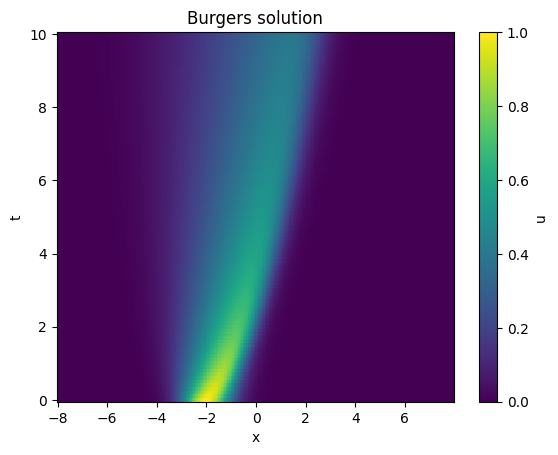

In [ ]:
# Plotting example

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

data = loadmat('../PDE-FIND-master/PDE-FIND-master/Datasets/burgers.mat')

x = np.squeeze(data["x"])
t = np.squeeze(data["t"])

u = data.get("u", None)
if u is None:
    u = data["usol"]  # your file uses this

# sanity check: how big is the imaginary part?
imax = np.max(np.abs(np.imag(u)))
rmax = np.max(np.abs(np.real(u)))
print("max|Im(u)|:", imax, "   max|Re(u)|:", rmax, "   ratio:", imax/(rmax+1e-12))

# convert to real safely
u = np.real_if_close(u, tol=1000)  # if imag is tiny, it becomes real
u = np.asarray(u, dtype=np.float64)  # ensure float

# fix orientation if needed: want u.shape == (len(x), len(t))
if u.shape == (t.size, x.size):
    u = u.T

X, T = np.meshgrid(x, t, indexing="ij")

plt.pcolormesh(X, T, u, shading="auto")
plt.xlabel("x"); plt.ylabel("t")
plt.title("Burgers solution")
plt.colorbar(label="u")
plt.show()


In [219]:
# Dataset Builder

def build_dataset_from_burgers(
    N=256, L=2*np.pi, nu=0.02, dt=2e-3, T=1.0,
    noise_level=0.05, stride_t=32, stride_x=16, seed=0,
    # --- new controls ---
    time_ranges=None,          # e.g. (0.0, 0.2) or [(0.0,0.2),(0.2,0.5)]
    quantile_splits=None,      # e.g. 3 -> thirds over time (ignored if time_ranges given)
    shock_bins=None,           # e.g. [0.5, 1.0, 2.0] thresholds for max|u_x| (ignored if time_ranges/quantile_splits given)
    return_partitions=False,   # if True, return dict of partitions; else return a single concatenated set
    central_diff=True          # used only for shock_bins (u_x estimation)
):
    """
    If return_partitions=False (default): returns (t_s, x_s, y_s, y_noisy, N) for the selected times (or all).
    If return_partitions=True: returns an OrderedDict[name] -> (t_s, x_s, y_s, y_noisy, N)
    """
    cfg = BurgersConfig(N=N, L=L, nu=nu, dt=dt, T=T, seed=seed)
    x, u_final, t_end, (history_t, history_u) = solve_burgers(cfg, return_history=True)
    np.random.seed(cfg.seed)  # for reproducibility of noise

    T_snap, X_pts = history_u.shape
    # 2D grids (rows=time, cols=space)
    t2d = np.repeat(history_t[:, None], X_pts, axis=1)      # (T_snap, N)
    x2d = np.repeat(x[None, :], T_snap, axis=0)             # (T_snap, N)
    u2d = history_u                                         # (T_snap, N)

    # ------ build time partitions ------
    from collections import OrderedDict
    partitions = OrderedDict()

    def _pack(name, t_mask):
        # apply spatial stride first (on columns), then time mask (on rows), then time stride (on rows)
        cols = slice(0, None, stride_x)
        # If t_mask is an array of indices/bool mask, we’ll subsample those rows by stride_t order.
        if t_mask.dtype == bool:
            rows = np.where(t_mask)[0][::stride_t]
        else:
            rows = np.asarray(t_mask)[::stride_t]

        t_s = t2d[rows][:, cols].flatten()
        x_s = x2d[rows][:, cols].flatten()
        y_s = u2d[rows][:, cols].flatten()

        if noise_level and noise_level > 0:
            y_noisy = y_s + noise_level * np.random.randn(*y_s.shape)
        else:
            y_noisy = y_s

        partitions[name] = (
            t_s.astype(np.float32),
            x_s.astype(np.float32),
            y_s.astype(np.float32),
            y_noisy.astype(np.float32),
            N,
        )

    if time_ranges is not None:
        # absolute ranges in time
        if isinstance(time_ranges, tuple):
            time_ranges = [time_ranges]
        for (a, b) in time_ranges:
            mask = (history_t >= a) & (history_t <= b)
            _pack(f"[{a:.4g},{b:.4g}]", mask)

    elif quantile_splits is not None and quantile_splits >= 1:
        # split evenly by quantiles of time
        qs = np.linspace(0, 1, quantile_splits + 1)
        edges = np.quantile(history_t, qs)
        for i in range(len(edges) - 1):
            a, b = edges[i], edges[i+1]
            # include right edge on last bin so all points are captured
            if i < len(edges) - 2:
                mask = (history_t >= a) & (history_t < b)
            else:
                mask = (history_t >= a) & (history_t <= b)
            _pack(f"Q{i+1}:{a:.4g}-{b:.4g}", mask)

    elif shock_bins is not None and len(shock_bins) > 0:
        # simple shock proxy: max_x |u_x(t,·)| per time; then bin by thresholds
        # central differences on periodic domain
        if central_diff:
            dx = L / N
            # roll-based periodic centered difference
            ux = (np.roll(u2d, -1, axis=1) - np.roll(u2d, 1, axis=1)) / (2 * dx)
        else:
            # forward difference periodic
            dx = L / N
            ux = (np.roll(u2d, -1, axis=1) - u2d) / dx

        shock_metric = np.max(np.abs(ux), axis=1)  # shape (T_snap,)
        # build bins like: (-inf, t1], (t1, t2], ..., (tk, +inf)
        edges = [-np.inf] + list(shock_bins) + [np.inf]
        for i in range(len(edges) - 1):
            lo, hi = edges[i], edges[i+1]
            # left-open except first, right-closed
            if i == 0:
                mask = (shock_metric <= hi)
            else:
                mask = (shock_metric > lo) & (shock_metric <= hi)
            _pack(f"shock∈({lo:.3g},{hi:.3g}]", mask)

    else:
        # default: everything
        all_rows = np.arange(T_snap)
        _pack("all", all_rows)

    # ------ return style ------
    if return_partitions:
        return partitions
    else:
        # if multiple partitions were created but caller wants a single set,
        # concatenate them in time order
        if len(partitions) == 1:
            return next(iter(partitions.values()))
        else:
            ts, xs, ys, ns = [], [], [], []
            for (_name, (t_s, x_s, y_s, y_noisy, _N)) in partitions.items():
                ts.append(t_s); xs.append(x_s); ys.append(y_s); ns.append(y_noisy)
            return (np.concatenate(ts), np.concatenate(xs),
                    np.concatenate(ys), np.concatenate(ns), N)


In [220]:
# === Ridge ===
def solve_v_ridge(Phi, y, lam=1e-4):
    # Phi: [N,K], y: [N,1]
    # center/scale (keep stats if you want to map back)
    mu = Phi.mean(0, keepdim=True)
    sig = Phi.std(0, keepdim=True) + 1e-6
    Z = (Phi - mu) / sig
    # normal equations (K small), stable with cholesky
    K = Z.shape[1]
    G = Z.T @ Z
    A = G + lam * torch.eye(K, device=G.device, dtype=G.dtype)
    b = Z.T @ y
    c = torch.linalg.solve(A, b)            # [K,1] ridge solution in normalized space
    # optional soft-threshold for sparsity
    # c = pt.sign(c) * pt.clamp(c.abs() - tau, min=0.0)
    # undo feature scaling so coefficients match original Phi columns
    c_unscaled = c / sig.T                  # reverse std
    # bias term (if v has bias): b0 = ȳ - sum_j c_j * Φ̄_j
    b0 = y.mean(0) - (mu @ c_unscaled).squeeze(0)
    return c_unscaled.squeeze(1), b0  # (K,), scalar

In [221]:
# Helpers
# =======================
def print_args(args, title="Run config"):
    d = vars(args)
    # stringify lists nicely, keep other types as-is
    def _fmt(v):
        return " ".join(map(str, v)) if isinstance(v, (list, tuple)) else v
    d = {k: _fmt(v) for k, v in d.items()}
    width = max(len(k) for k in d)
    lines = [f"{k.rjust(width)} : {d[k]}" for k in sorted(d)]
    bar = "-" * (width + 2 + max(len(str(v)) for v in d.values()))
    print(f"\n{title}\n{bar}\n" + "\n".join(lines) + f"\n{bar}\n")

def make_tag(params: dict, keys=None):
    """Stable tag from selected hyperparams (sorted keys)."""
    if keys is None:
        keys = sorted(params.keys())
    parts = [f"{k}={params[k]}" for k in keys]
    return "__".join(parts).replace(" ", "")

def ensure_dir(p: Path):
    p.mkdir(parents=True, exist_ok=True)

def savefig_atomic(fig_path):
    fig_path = Path(fig_path)
    if fig_path.suffix.lower() != ".pdf":
        fig_path = fig_path.with_suffix(".pdf")
    ensure_dir(fig_path.parent)

    # Get a temp pathname, then close the fd so savefig can open it on Windows
    fd, tmp_name = tempfile.mkstemp(dir=fig_path.parent, suffix=".pdf")
    os.close(fd)

    # Note: dpi is ignored for vector elements in PDF; keep it only if you rasterize parts
    plt.savefig(tmp_name, format="pdf", bbox_inches="tight")
    os.replace(tmp_name, fig_path)  # atomic replace on same filesystem
    plt.close()

def save_npy_atomic(path: Path, arr):
    path = Path(path)
    if path.suffix == "":
        path = path.with_suffix(".npy")
    ensure_dir(path.parent)

    # Create temp path, close fd so numpy can open it on Windows
    fd, tmp_name = tempfile.mkstemp(dir=str(path.parent), suffix=".npy")
    os.close(fd)

    with open(tmp_name, "wb") as f:
        np.save(f, arr)

    os.replace(tmp_name, str(path))


def u_over_domain(trainer_u, t_np, x_np):
    device = next(trainer_u.parameters()).device
    t_flat = torch.tensor(t_np.reshape(-1, 1), dtype=torch.float32, device=device)
    x_flat = torch.tensor(x_np.reshape(-1, 1), dtype=torch.float32, device=device)
    with torch.no_grad():
        U_pred = trainer_u(t_flat, x_flat).detach().cpu().numpy().reshape(-1)
    return U_pred

def u_minus_true(u_pred, t_np, x_np, y_np, round_decimals=6):
    t_r = np.round(t_np, round_decimals)
    x_r = np.round(x_np, round_decimals)
    order = np.lexsort((x_r, t_r))  # primary key = t, secondary = x
    y_sorted = y_np.reshape(-1)[order]
    up_sorted = u_pred[order]
    max_abs_diff = float(np.max(np.abs(up_sorted - y_sorted)))
    return up_sorted - y_sorted, max_abs_diff

def snapshot_comp(
    trainer_u,
    stride_x,
    stride_t,
    y_noisy_np,
    y_np,
    t_np,
    x_np,
    snap_no=5,
    snap_which=None,
    round_decimals=6,
):
    """
    Single-figure version: left = heatmap of u_pred(t,x),
    right = snapshots (pred vs true) at selected times.
    Returns (fig, payload_dict).
    """

    u_model = trainer_u
    device = next(u_model.parameters()).device

    # 1) Predict at provided points
    t_flat = torch.tensor(t_np.reshape(-1, 1), dtype=torch.float32, device=device)
    x_flat = torch.tensor(x_np.reshape(-1, 1), dtype=torch.float32, device=device)
    with torch.no_grad():
        U_pred = u_model(t_flat, x_flat).detach().cpu().numpy().reshape(-1)

    # 2) Robust grid reconstruction
    t_r = np.round(t_np, round_decimals)
    x_r = np.round(x_np, round_decimals)
    order = np.lexsort((x_r, t_r))  # primary key = t, secondary = x
    t_sorted  = t_r[order]
    x_sorted  = x_r[order]
    yp_sorted = y_noisy_np.reshape(-1)[order]
    y_sorted = y_np.reshape(-1)[order]
    up_sorted = U_pred[order]
    max_abs_diff = float(np.max(np.abs(up_sorted - y_sorted)))
    print(f"max_abs_diff = {max_abs_diff:.6g}")
    
    t_unique = np.unique(t_sorted)
    x_unique = np.unique(x_sorted)
    Nt, Nx = len(t_unique), len(x_unique)

    if t_sorted.size != Nt * Nx:
        raise ValueError(
            f"Data are not a full rectangular grid: len={t_sorted.size}, Nt={Nt}, Nx={Nx}."
            " Interpolate to a rectangular grid before plotting."
        )

    U_true = yp_sorted.reshape(Nt, Nx)
    U_no_noise = y_sorted.reshape(Nt,Nx)
    U_pred_grid = up_sorted.reshape(Nt, Nx)
    
    # 3) Select snapshot times
    # --- Figure 1: heatmap ---
    fig_hm, ax0 = plt.subplots(figsize=(6, 4), constrained_layout=True)
    im = ax0.imshow(
        U_pred_grid,
        extent=[x_unique.min(), x_unique.max(), t_unique.min(), t_unique.max()],
        origin='lower',
        aspect='auto',
        cmap='viridis'
    )
    cbar = fig_hm.colorbar(im, ax=ax0)
    cbar.set_label('u_pred')
    ax0.set_xlabel('x')
    ax0.set_ylabel('t')
    ax0.set_title('Predicted u(t,x)')

    # choose idxs first (same logic you already have)
    if snap_which is None:
        idxs = np.linspace(0, Nt - 1, snap_no, dtype=int)
    else:
        idxs = np.asarray(snap_which, dtype=int)
        idxs = idxs[(idxs >= 0) & (idxs < Nt)]
        if idxs.size == 0:
            idxs = np.array([0], dtype=int)

    n_snaps = len(idxs)

    # layout: up to 3 columns per row
    max_cols = 3
    n_cols = min(n_snaps, max_cols)
    n_rows = int(np.ceil(n_snaps / n_cols))

    fig, axes = plt.subplots(
        n_rows, n_cols,
        figsize=(4 * n_cols, 3 * n_rows),  # tune to your LaTeX textwidth
        constrained_layout=True
    )

    axes = np.atleast_1d(axes).ravel()

    for ax, k in zip(axes, idxs):
        ax.plot(x_unique, U_pred_grid[k, :], label="pred")
        ax.plot(x_unique, U_true[k, :], '--', alpha=0.9, label="noisy")
        ax.plot(x_unique, U_no_noise[k, :], '--', alpha=0.9, label="true")

        ax.set_xlabel('x')
        ax.set_ylabel('u')
        ax.set_title(f't = {t_unique[k]:.3f}')
        ax.legend(fontsize=7)

    # hide unused axes if grid bigger than number of snapshots
    for ax in axes[len(idxs):]:
        ax.axis('off')
    plt.close(fig_hm)
    plt.close(fig) 
    payload = {
        "t_unique": t_unique,
        "x_unique": x_unique,
        "U_true": U_true,
        "U_pred": U_pred_grid,
        "order": order,
        "Nt": Nt,
        "Nx": Nx,
        "snap_indices": idxs,
    }

    return fig, payload

def patch_trainer_with_symnet(
    trainer,
    primitive_names=("u","u_x","u_xx"),
    primitive_orders=(0,1,2),
    product_layers=(8,8),
    skip=True,                      # <— your `skip` flag
    # learning rates per group:
    lr_u=1e-3,
    lr_prod=1e-2,                   # W1/W2 (make these larger so products learn)
    lr_gate=1e-2,                   # gates (open/close products)
    lr_readout=3e-2,                # final linear head (smaller so it doesn’t hog)
    lr_skip=3e-4,                   # skip matrices (if enabled)
    lr_a=5e-4                       # derivative-order scaler
):
    # 1) build SymNet with or without linear skips
    sym = SymNetHead(
        primitive_names=primitive_names,
        primitive_orders=primitive_orders,
        product_layers=product_layers,
        add_linear_skip=skip,
        readout_bias=True
    ).to(trainer.device)

    trainer.v = SymNetAdapter(sym)
    trainer.selected_derivs = list(primitive_names)

    # 2) collect param groups
    u_params      = list(trainer.u.parameters())
    readout_params= list(sym.readout.parameters())
    a_params      = [sym.log_a]

    prod_params, gate_params, skip_params = [], [], []
    for layer in sym.layers:
        prod_params += [layer.W1, layer.W2]          # product builders
        gate_params += [layer.gate]                  # gates
        if hasattr(layer, "skip"):                   # optional skips
            skip_params += list(layer.skip.parameters())

    # 3) build optimizer with separate LRs
    param_groups = [
        {"params": u_params,       "lr": lr_u},
        {"params": prod_params,    "lr": lr_prod},
        {"params": gate_params,    "lr": lr_gate},
        {"params": readout_params, "lr": lr_readout},
        {"params": a_params,       "lr": lr_a},
    ]
    if skip_params:
        param_groups.append({"params": skip_params, "lr": lr_skip})

    trainer.optimizer = torch.optim.Adam(param_groups)
    return trainer

def manual_flash(
    trainer,
    keep=None,            # list of indices or feature-names to KEEP (others zeroed)
    set_vals=None,        # dict {idx_or_name: value} to set specific coefficients
    bias=None,            # if not None, set readout bias to this scalar
    zero_else=True,       # if True, zero all coefficients not in `keep` (after applying set_vals)
    verbose=True
):
    """
    Manually "flash" (force) coefficients of the SymNet readout similarly to an elastic flash.
    - trainer: object that has trainer.v (SymNetAdapter) created by patch_trainer_with_symnet.
    - keep: list of ints (feature indices) or list of str (feature names from trainer.feature_names) to retain.
    - set_vals: dict mapping indices or names to explicit coefficient values.
    - bias: optional scalar to force the readout bias.
    Returns a dict {'before': before_coeffs, 'after': after_coeffs, 'bias_before': b0, 'bias_after': b1}.
    """
    # locate SymNet instance
    v = getattr(trainer, "v", trainer)
    sym = getattr(v, "sym", None) or v  # SymNetHead or wrapper
    if not hasattr(sym, "readout"):
        raise RuntimeError("Could not find `readout` on trainer.v (expecting SymNetHead.readout).")
    readout = sym.readout
    w_tensor = readout.weight.detach().cpu().clone()  # shape (out_dim, in_dim)
    bias_before = None
    if readout.bias is not None:
        bias_before = readout.bias.detach().cpu().item()
    # flatten coefficients per-feature (assume out_dim == 1 typically)
    out_dim, in_dim = w_tensor.shape
    flat_before = w_tensor.view(-1).numpy().copy()
    # resolve keep indices if names provided
    keep_idx = set()
    feature_names = getattr(trainer, "feature_names", None)
    def name_to_idx(key):
        if isinstance(key, int):
            return int(key)
        if isinstance(key, str):
            if feature_names is None:
                raise ValueError("Feature names not available on trainer; cannot map name -> index.")
            try:
                return feature_names.index(key)
            except ValueError:
                raise ValueError(f"Feature name '{key}' not found in trainer.feature_names.")
        raise TypeError("Keys in keep/set_vals must be int indices or feature name strings.")
    if keep is not None:
        for k in keep:
            keep_idx.add(name_to_idx(k))
    # prepare set_vals mapping to indices
    set_map = {}
    if set_vals:
        for k, v in set_vals.items():
            idx = name_to_idx(k)
            set_map[idx] = float(v)
            # also ensure explicitly-set indices are preserved
            keep_idx.add(idx)
    # build new flat coeffs
    flat_new = flat_before.copy()
    if zero_else and keep_idx:
        mask = np.zeros_like(flat_new, dtype=bool)
        for i in keep_idx:
            if not (0 <= i < in_dim):
                raise IndexError(f"index {i} out of range (0..{in_dim-1})")
            mask[i] = True
        flat_new[~mask] = 0.0
    # apply explicit set values
    for i, v in set_map.items():
        if not (0 <= i < in_dim):
            raise IndexError(f"index {i} out of range (0..{in_dim-1})")
        flat_new[i] = float(v)
    # write back into the model (in-place, no grad)
    with torch.no_grad():
        new_w = torch.tensor(flat_new, dtype=readout.weight.dtype).view_as(readout.weight)
        readout.weight.data.copy_(new_w.to(readout.weight.device))
        bias_after = None
        if bias is not None:
            if readout.bias is None:
                # create bias parameter if missing (unlikely)
                readout.bias = torch.nn.Parameter(torch.tensor(float(bias), device=readout.weight.device, dtype=readout.weight.dtype))
                bias_after = float(bias)
            else:
                readout.bias.data.fill_(float(bias))
                bias_after = float(bias)
        else:
            if readout.bias is not None:
                bias_after = float(readout.bias.detach().cpu().item())
    if verbose:
        kept = sorted(list(keep_idx))
        print(f"manual_flash: kept indices = {kept}")
        if set_map:
            print(f"manual_flash: set_vals = {set_map}")
        print(f"bias: before={bias_before} after={bias_after}")
    return {
        "before": flat_before,
        "after": flat_new,
        "bias_before": bias_before,
        "bias_after": bias_after,
    }

# small helper: quiet training (coeff_plot=False avoids linear-head extractor)
def train_quiet(trainer, epochs, batch_fn, train_data=True, train_pde=True, log_every=200):
    lt, ld, lp, ll = [], [], [], []
    for ep in range(epochs):
        t, x, y = batch_fn()
        out = trainer.step(t, x, y, train_data=train_data, train_pde=train_pde, coeff_plot=False)
        lt.append(out["total_loss"]); ld.append(out["data_loss"])
        lp.append(out["pde_loss"]);   ll.append(out["l1_penalty"])
        if (ep % log_every) == 0:
            print(f"Epoch {ep}: total={out['total_loss']:.3e}  data={out['data_loss']:.3e}  "
                  f"pde={out['pde_loss']:.3e}  a={out['a_hat']:.3g}")
    return lt, ld, lp, ll


In [ ]:
x = torch.randn(10)

print(x)
torch.norm(x/torch.norm(x))

tensor([-1.4928,  0.7912, -2.0213, -1.0646, -0.5670,  0.5231,  0.4113, -0.7284,
         1.1415, -0.3269])


tensor(1.)

In [222]:
epochs = 10000
batch_size = 1000
lr = 0.01
noise = 0.0
log_every = 1000
lam_reg = 0
lam_pde = 0.5
lam_data = 50.0
lam_tv = 1e-4
lam_a = 1e-3
coeff_plot = False
nu = 0.1
selected_derivs = ('uu_x', 'u_xx', 'u_x')
true_pde = {
    'u_xx': nu,
    'uu_x': -1.0,
}
stride_x = 10
stride_t = 10
#seed=34522
seed=1
part_num = 1
which_part = 1

In [ ]:
# === Main ===
#partitions = build_dataset_from_burgers(noise_level=noise, nu=nu, stride_t=stride_t, stride_x=stride_x, quantile_splits=part_num, return_partitions=True)
#t_np, x_np, y_np, y_noisy_np, N = partitions[[k for k in partitions if k.startswith(f'Q{which_part}:')][0]]

partitions = load_burgers_mat_as_flat('../PDE-FIND-master/PDE-FIND-master/Datasets/burgers.mat',noise_level=noise,stride_t=stride_t,stride_x=stride_x,seed=seed,quantile_splits=part_num,return_partitions=True,)
t_np, x_np, y_np, y_noisy_np, N = partitions[[k for k in partitions if k.startswith(f"Q{which_part}:")][0]]

t_torch       = torch.from_numpy(t_np).to(device)
x_torch       = torch.from_numpy(x_np).to(device)
y_torch       = torch.from_numpy(y_np).to(device)
y_noisy_torch = torch.from_numpy(y_noisy_np).to(device)

def make_nonlinear_batch(batch_size=batch_size, noise=noise):
    N = t_torch.shape[0]
    idx = torch.randint(0, N, (batch_size,), device=device)
    t_batch = t_torch[idx][:, None]
    x_batch = x_torch[idx][:, None]
    y_src   = y_noisy_torch if (noise and noise > 0) else y_torch
    y_batch = y_src[idx][:, None]

    return t_batch.float(), x_batch.float(), y_batch.float(), y_torch[idx][:, None].float()

u_config = dict(n_layers=4, hidden_size=64)
v_config = dict(input_size=len(selected_derivs), n_layers=1, hidden_size=1, linear_only=True)
trainer_nl = PDETrainerNonlinear(
    u_config, v_config, lr=lr,
    lambda_reg=lam_reg, lambda_tv=lam_tv, lambda_pde=lam_pde, lambda_data=lam_data, device=device, selected_derivs=selected_derivs, true_pde=true_pde
)

C:\Users\sami\AppData\Local\Temp\ipykernel_9668\2761545063.py:33: ComplexWarning: Casting complex values to real discards the imaginary part
  u = np.asarray(u, dtype=np.float64)


In [227]:
# Train
# Phase A: u only pretrain 
lt, ld, lp, ll, ltv, a_val, pt_resid, pt_data, ga, gu, gv, CE, names = trainer_nl.train(
    epochs=1000,
    batch_fn=make_nonlinear_batch,
    coeff_plot=False,
    log_every=1000
)


torch.Size([1000, 1]) torch.Size([1000, 1]) torch.Size([1000, 3])
Epoch 0: total=3.8076e+00, data=7.6123e-02, pde=2.9026e-03, l1=1.0750e+00, ltv=3.6425e-02, a=1.0000e+00, pt_resid=3.7206e-03, pt_data=7.6123e-02

Coefficients on F (features fed into v):
  b_F  = 0.000000
  -0.504214 · u_x
  +0.407263 · u_xx
  -0.163537 · uu_x

Coefficients on raw library terms (undoing per-column ||raw|| normalization):
  b_raw = 0.000000
  -0.363463 · u_x
  +0.568462 · u_xx
  -1.182927 · uu_x

Physical u_t coefficients (assuming training used u_t / a_hat^2):
  a_hat = 1.000000
  b_phys = 0.000000
  -0.363463 · u_x
  +0.568462 · u_xx
  -1.182927 · uu_x
v(F)  =  b  +  Σ w_i · f_i    (training space)
  b   = 0.000000
  -0.363463 · u_x
  +0.568462 · u_xx
  -1.182927 · uu_x
torch.Size([1000, 1]) torch.Size([1000, 1]) torch.Size([1000, 3])
torch.Size([1000, 1]) torch.Size([1000, 1]) torch.Size([1000, 3])
torch.Size([1000, 1]) torch.Size([1000, 1]) torch.Size([1000, 3])
torch.Size([1000, 1]) torch.Size([1000,

KeyboardInterrupt: 

In [ ]:
trainer_nl.set_lrs(lr_u=0.01)

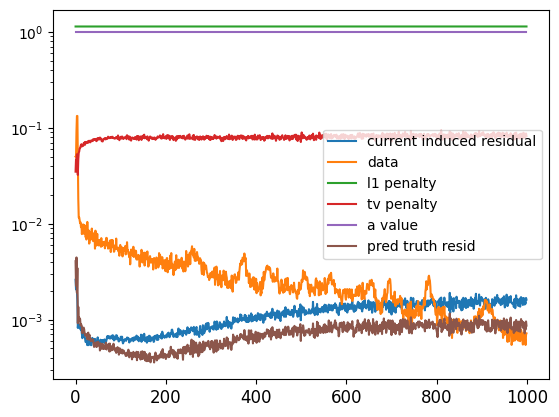

In [ ]:
included = len(lt)
window = max(1, included // 200)
#plt.plot(torch.arange(0, included), torch.tensor(lt).view(included, -1).mean(dim=1)[:included], label='current induced residual')
plt.plot(torch.arange(0, included), torch.tensor(lp).view(included, -1).mean(dim=1)[:included], label='current induced residual')
plt.plot(torch.arange(0, included), torch.tensor(ld).view(included, -1).mean(dim=1)[:included], label='data')
plt.plot(torch.arange(0, included), torch.tensor(ll).view(included, -1).mean(dim=1)[:included], label='l1 penalty')
plt.plot(torch.arange(0, included), torch.tensor(ltv).view(included, -1).mean(dim=1)[:included], label='tv penalty')
plt.plot(torch.arange(0, included), torch.tensor(a_val).view(included, -1).mean(dim=1)[:included], label='a value')
plt.plot(torch.arange(0, included), torch.tensor(pt_resid).view(included, -1).mean(dim=1)[:included], label='pred truth resid')
#plt.plot(torch.arange(0, included), torch.tensor(pt_data).view(included, -1).mean(dim=1)[:included], label='pred truth data')
plt.xticks(fontsize=12)
plt.yscale('log')
plt.legend(loc='best')


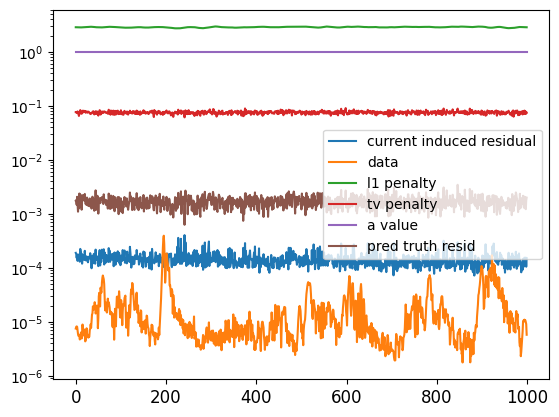

In [ ]:

included = len(lt)
window = max(1, included // 200)
#plt.plot(torch.arange(0, included), torch.tensor(lt).view(included, -1).mean(dim=1)[:included], label='current induced residual')
plt.plot(torch.arange(0, included), torch.tensor(lp).view(included, -1).mean(dim=1)[:included], label='current induced residual')
plt.plot(torch.arange(0, included), torch.tensor(ld).view(included, -1).mean(dim=1)[:included], label='data')
plt.plot(torch.arange(0, included), torch.tensor(ll).view(included, -1).mean(dim=1)[:included], label='l1 penalty')
plt.plot(torch.arange(0, included), torch.tensor(ltv).view(included, -1).mean(dim=1)[:included], label='tv penalty')
plt.plot(torch.arange(0, included), torch.tensor(a_val).view(included, -1).mean(dim=1)[:included], label='a value')
plt.plot(torch.arange(0, included), torch.tensor(pt_resid).view(included, -1).mean(dim=1)[:included], label='pred truth resid')
#plt.plot(torch.arange(0, included), torch.tensor(pt_data).view(included, -1).mean(dim=1)[:included], label='pred truth data')
plt.xticks(fontsize=12)
plt.yscale('log')

plt.legend(loc='best')


In [ ]:

trainer_nl.set_lrs(lr_u)

In [ ]:

# Phase B: Flash coeffs with least square
trainer_nl.elastic_flash(
    batch_fn= make_nonlinear_batch,
    num_batches=512,     # bigger cache → steadier coefficients
    lambda1=5e-4,        # try 1e-4..1e-2, higher → sparser
    lambda2=1e-4,        # small ridge to tame collinearity
    standardize=True,
    max_iter=2000,
    tol=1e-6,
    verbose=True
)

u_pred = u_over_domain(trainer_nl.u, t_np, x_np)
u_diff, max_diff = u_minus_true(u_pred, t_np, x_np, y_np)
print(f"Max abs difference after flash: {max_diff:.6g}")


[elastic_flash] N=512000, d=2, λ1=0.0005, λ2=0.0001, iters=6
[elastic_flash] cond(F^T F)≈1.57e+00, max|corr|≈0.222
Max abs difference after flash: 0.132788


In [ ]:
trainer_nl.v

symMLP(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=1, bias=False)
  )
)

64 batch size

max_abs_diff = 0.140681


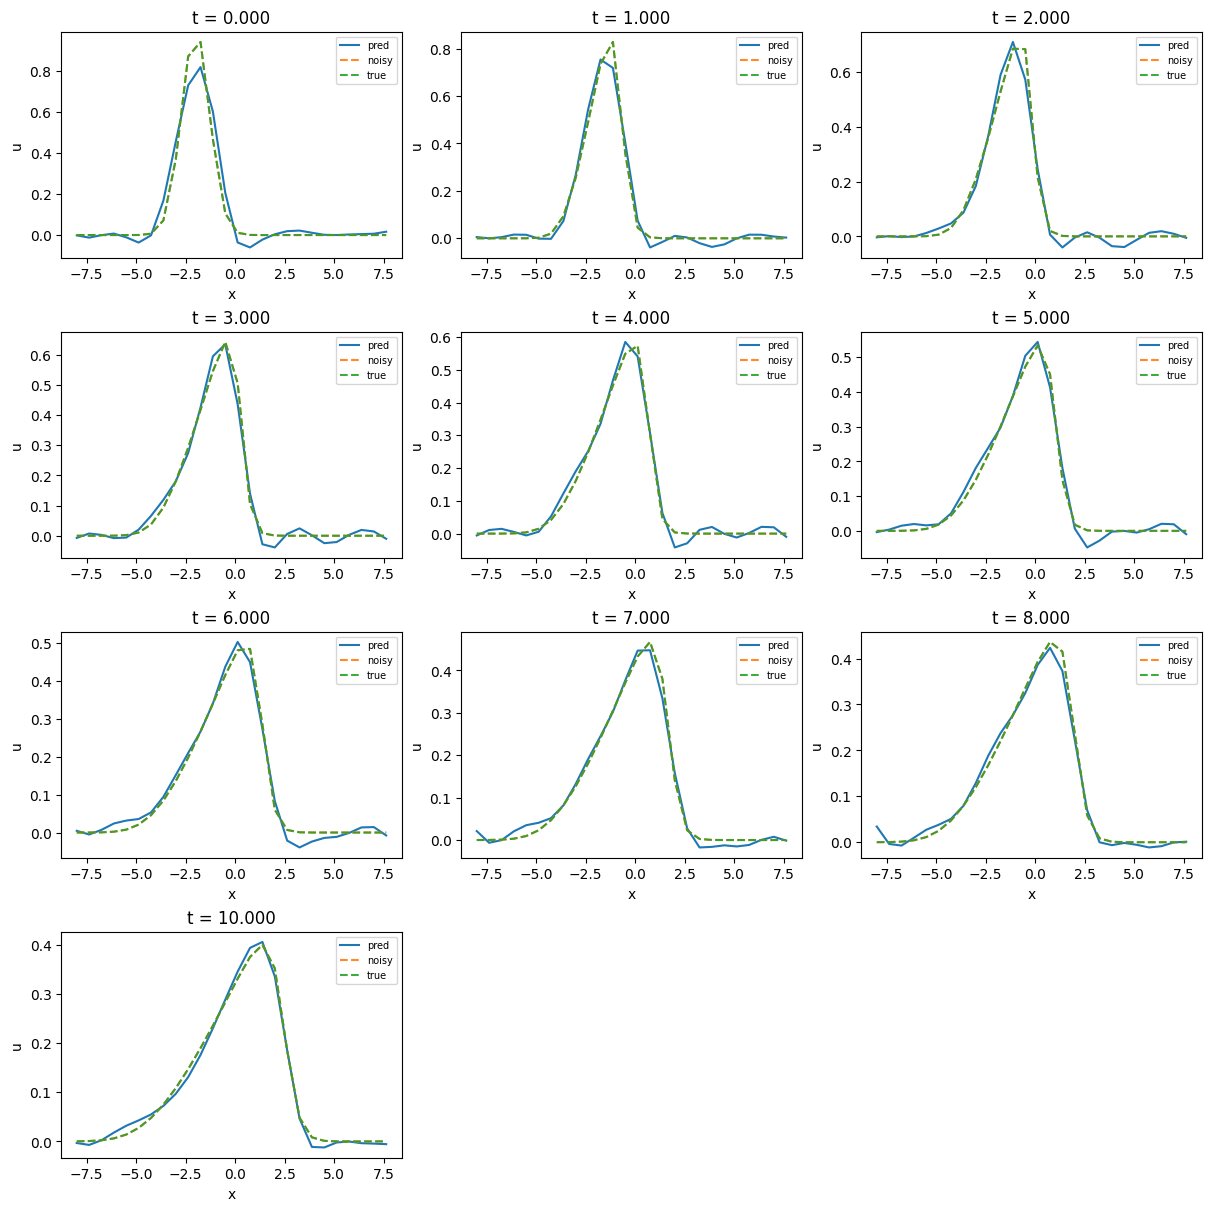

In [ ]:
snapshot_comp(trainer_nl.u, stride_x, stride_t, y_noisy_np, y_np, t_np, x_np, snap_no=10)[0]

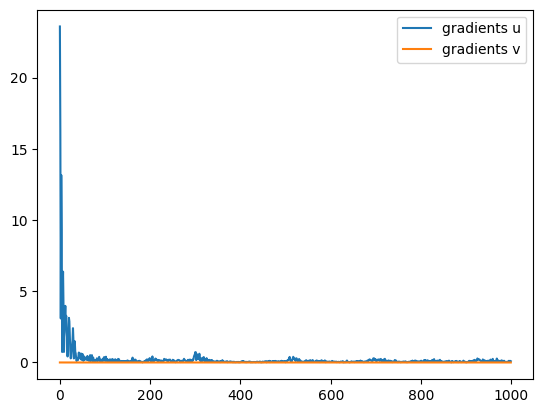

In [ ]:
plt.plot(torch.arange(0, included), torch.tensor(gu).view(included, -1).mean(dim=1)[:included], label='gradients u')
plt.plot(torch.arange(0, included), torch.tensor(gv).view(included, -1).mean(dim=1)[:included], label='gradients v')
plt.legend(loc='best')

Prediction-truth error for our Current (joint) model: 

SimpleMLP model creates best fits for given data (for 0 noise). 'pred truth data' and 'data' are interchangeable when 0 noise. If we are to hope for a 'smooth enough' solution then we should only hope to push 'data' to zero for no noise level, otherwise the prediction provided by SimpleMLP is determined by a 'best fit' of the noisy data. Further study is required to understand how this 'best fit' is selected according to the loss function, specifically the loss of the current residual induced by the prediction given by SimpleMLP. Recall that 'current induced residual' is an indication of the residual for the current pred with differentiation by t (by autodiff) and the current predicted operator (symMLP). 'pred truth data' is useful for noisy situations as 'data' compares pred error to the given noisy data. 